## Create condition-specific EV files

In [1]:
import os
from os.path import join
import numpy as np
import pandas as pd
from glob import glob
from math import sqrt
%matplotlib inline
import seaborn as sns
sns.set_palette('muted')
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
# Array containing subject ids

#subs = ['WMAZE_001']

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

# Array containing the three sets
stim_sets = ['set1', 'set2', 'set3']

# Loop to grab correct 6 run text files for each subject
for sub in subs:
    # Array containing path to behavior files
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    # Array containing current sub's 6 behavior file runs
    dir_file = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub)))    
    # Sort current sub's txt files in order of run
    dir_file.sort() 

       
    # Loop through each of the set types 
    for i, curr_set in enumerate(stim_sets):
        # Create dataframe for text files to extract EVS
        run1 = pd.read_table(dir_file[i * 2])
        run2 = pd.read_table(dir_file[i * 2 + 1])
        
        #removal of the last 3 trials to avoid scanner artifact
        run1 = run1[:-3]
        run2 = run2[:-3]
        
      
        # Remove BL trials -- lets you grab the fixed before conditional with intervening BL trials 
        noBL_run1 = run1.query('TrialType != "BL"')       
        noBL_run2 = run2.query('TrialType != "BL"') 
        
        # Without BLs
        run1_trialtype = noBL_run1['TrialType'].values
        run1_correct = noBL_run1['Correct'].values
        run1_resp = noBL_run1['Resp'].values
        
        run2_trialtype = noBL_run2['TrialType'].values
        run2_correct = noBL_run2['Correct'].values
        run2_resp = noBL_run2['Resp'].values

 
        # Shift the TrialType column up by 1 and insert dummy element into the first index
        # Run 1
        run1_trial_shift = run1_trialtype[1:] 
        run1_trial_shift = np.insert(run1_trial_shift, -1, -1)
        # Run 2
        run2_trial_shift = run2_trialtype[1:]
        run2_trial_shift = np.insert(run2_trial_shift, -1, -1)

        # Shift the Correct column up by 1 and insert dummy element into the first index
        # Run 1
        run1_correct_shift = run1_correct[1:]
        run1_correct_shift = np.insert(run1_correct_shift, -1, -1)
        # Run 2
        run2_correct_shift = run2_correct[1:]
        run2_correct_shift = np.insert(run2_correct_shift, -1, -1)
        
        
        # Same as above, but maintaining BL trials -- for use in all_remaining EV to model BL trials
        # With BLs
        run1_trialtypeBL = run1['TrialType'].values
        run1_correctBL = run1['Correct'].values
        run1_respBL = run1['Resp'].values 
        run2_trialtypeBL = run2['TrialType'].values
        run2_correctBL = run2['Correct'].values
        run2_respBL = run2['Resp'].values
        
        # Shift the TrialType column up by 1 and insert dummy element into the first index
        run1_trial_shiftBL = run1_trialtypeBL[1:] 
        run1_trial_shiftBL = np.insert(run1_trial_shiftBL, -1, -1)
        run2_trial_shiftBL = run2_trialtypeBL[1:]
        run2_trial_shiftBL = np.insert(run2_trial_shiftBL, -1, -1)

        # Same for Correct column
        run1_correct_shiftBL = run1_correctBL[1:]
        run1_correct_shiftBL = np.insert(run1_correct_shiftBL, -1, -1)
        run2_correct_shiftBL = run2_correctBL[1:]
        run2_correct_shiftBL = np.insert(run2_correct_shiftBL, -1, -1)
       
        
        # Run 1
        run1_A_before_B_corr = np.where((run1_trial_shift == 'B') & (run1_trialtype == 'A') & (run1_correct_shift == 1))
        run1_A_before_B_incorr = np.where((run1_trial_shift == 'B') & (run1_trialtype == 'A') & (run1_correct_shift == 0))
        run1_C_before_B_corr = np.where((run1_trial_shift == 'B') & (run1_trialtype == 'C') & (run1_correct_shift == 1))
        run1_C_before_B_incorr = np.where((run1_trial_shift == 'B') & (run1_trialtype == 'C') & (run1_correct_shift == 0))
        #grabs all but BL and NR
        run1_all_but_BLNR = np.where((run1_trial_shift != 'B') & (run1_resp != 'NR') | (run1_trialtype == 'BL'))
        #use separate BL inclusive array to grab BL trials
        run1_BL_only = np.where((run1_trialtypeBL == 'BL') & (run1_respBL != 'NR'))
        run1_nonresponse = np.where((run1_respBL == 'NR'))
         

        # Run 2
        run2_A_before_B_corr = np.where((run2_trial_shift == 'B') & (run2_trialtype == 'A') & (run2_correct_shift == 1))
        run2_A_before_B_incorr = np.where((run2_trial_shift == 'B') & (run2_trialtype == 'A') & (run2_correct_shift == 0))
        run2_C_before_B_corr = np.where((run2_trial_shift == 'B') & (run2_trialtype == 'C') & (run2_correct_shift == 1))
        run2_C_before_B_incorr = np.where((run2_trial_shift == 'B') & (run2_trialtype == 'C') & (run2_correct_shift == 0))
        run2_all_but_BLNR = np.where((run2_trial_shift != 'B') & (run2_resp != 'NR') | (run2_trialtype == 'BL'))
        run2_BL_only = np.where((run2_trialtypeBL == 'BL') & (run2_respBL != 'NR'))
        run2_nonresponse = np.where((run2_respBL == 'NR'))


        # All onsets
        run1_onsets = noBL_run1['StimOnset']
        run2_onsets = noBL_run2['StimOnset']
        run1BL_onsets = run1['StimOnset']
        run2BL_onsets = run2['StimOnset']

        # Run 1 
        # Only A followed by correct B onsets  
        run1_A_before_B_corr_onsets = run1_onsets.values[run1_A_before_B_corr[0]]
        # Only A followed by incorrect B onsets 
        run1_A_before_B_incorr_onsets = run1_onsets.values[run1_A_before_B_incorr[0]]
        # Only C followed by correct B onsets 
        run1_C_before_B_corr_onsets = run1_onsets.values[run1_C_before_B_corr[0]]
        # Only C followed by incorrect B onsets 
        run1_C_before_B_incorr_onsets = run1_onsets.values[run1_C_before_B_incorr[0]]
        #all but BL and NR
        run1_all_but_BLNR_onsets = run1_onsets.values[run1_all_but_BLNR[0]]
        # Just BL trials
        run1_BL_only_onsets = run1BL_onsets.values[run1_BL_only[0]]
        # Non-response trials
        run1_nonresponse_onsets = run1BL_onsets.values[run1_nonresponse[0]]
        #print run1_all_but_BLNR_onsets
        #print run1_BL_only_onsets
            
        run1_all_remaining_onsets = np.hstack((run1_all_but_BLNR_onsets, run1_BL_only_onsets))
        #print run1_all_remaining
        run1_all_remaining_onsets.sort()
        #print run1_all_remaining
        
        # Run 2 
        run2_A_before_B_corr_onsets = run2_onsets.values[run2_A_before_B_corr[0]] 
        run2_A_before_B_incorr_onsets = run2_onsets.values[run2_A_before_B_incorr[0]]
        run2_C_before_B_corr_onsets = run2_onsets.values[run2_C_before_B_corr[0]]
        run2_C_before_B_incorr_onsets = run2_onsets.values[run2_C_before_B_incorr[0]]
        run2_all_but_BLNR_onsets = run2_onsets.values[run2_all_but_BLNR[0]]
        run2_BL_only_onsets = run2BL_onsets.values[run2_BL_only[0]]
        run2_nonresponse_onsets = run2BL_onsets.values[run2_nonresponse[0]]
        #print run1_all_but_BLNR_onsets
        #print run1_BL_only_onsets
            
        run2_all_remaining_onsets = np.hstack((run2_all_but_BLNR_onsets, run2_BL_only_onsets))
        run2_all_remaining_onsets.sort()


        # Run 1              
        # Use v-stack to create a matrix containing *ALL* onsets, durations, and amplitudes in vertical columns 
        run1_mtrx = np.vstack((run1_onsets,
                               # Numpy array filled with 3's
                               np.ones(len(run1_onsets)) * 3.0,
                               # Numpy array filled with 1's
                               np.ones(len(run1_onsets)))).T

        # CORRECT B after A ONLY
        run1_A_before_B_corr_mtrx = np.vstack((run1_A_before_B_corr_onsets, 
                                               np.ones(len(run1_A_before_B_corr_onsets)) * 3.0,
                                               np.ones(len(run1_A_before_B_corr_onsets)))).T

        # INCORRECT B after A ONLY  
        run1_A_before_B_incorr_mtrx = np.vstack((run1_A_before_B_incorr_onsets,
                                                 np.ones(len(run1_A_before_B_incorr_onsets)) * 3.0,
                                                 np.ones(len(run1_A_before_B_incorr_onsets)))).T

        # CORRECT B after C ONLY            
        run1_C_before_B_corr_mtrx = np.vstack((run1_C_before_B_corr_onsets,
                                              np.ones(len(run1_C_before_B_corr_onsets)) * 3.0,
                                              np.ones(len(run1_C_before_B_corr_onsets)))).T

        # INCORRECT B after C ONLY 
        run1_C_before_B_incorr_mtrx = np.vstack((run1_C_before_B_incorr_onsets,
                                                np.ones(len(run1_C_before_B_incorr_onsets)) * 3.0,
                                                np.ones(len(run1_C_before_B_incorr_onsets)))).T

        # ALL REMAINING TRIALS
        run1_all_remaining_mtrx = np.vstack((run1_all_remaining_onsets,
                                             np.ones(len(run1_all_remaining_onsets)) * 3.0,
                                             np.ones(len(run1_all_remaining_onsets)))).T
        
        # NONRESPONSE TRIALS
        run1_nonresponse_mtrx = np.vstack((run1_nonresponse_onsets,
                                           np.ones(len(run1_nonresponse_onsets)) * 3.0,
                                           np.ones(len(run1_nonresponse_onsets)))).T
        
        

        # RUN 2              
        # Use v-stack to create a matrix containing *ALL* onsets, durations, and amplitudes in vertical columns 
        run2_mtrx = np.vstack((run2_onsets,
                               # Numpy array filled with 3's
                               np.ones(len(run2_onsets)) * 3.0,
                               # Numpy array filled with 1's
                               np.ones(len(run2_onsets)))).T

        # CORRECT B after A ONLY
        run2_A_before_B_corr_mtrx = np.vstack((run2_A_before_B_corr_onsets, 
                                               np.ones(len(run2_A_before_B_corr_onsets)) * 3.0,
                                               np.ones(len(run2_A_before_B_corr_onsets)))).T

        # INCORRECT B after A ONLY  
        run2_A_before_B_incorr_mtrx = np.vstack((run2_A_before_B_incorr_onsets,
                                                 np.ones(len(run2_A_before_B_incorr_onsets)) * 3.0,
                                                 np.ones(len(run2_A_before_B_incorr_onsets)))).T

        # CORRECT B after C ONLY            
        run2_C_before_B_corr_mtrx = np.vstack((run2_C_before_B_corr_onsets,
                                              np.ones(len(run2_C_before_B_corr_onsets)) * 3.0,
                                              np.ones(len(run2_C_before_B_corr_onsets)))).T

        # INCORRECT B after C ONLY 
        run2_C_before_B_incorr_mtrx = np.vstack((run2_C_before_B_incorr_onsets,
                                                np.ones(len(run2_C_before_B_incorr_onsets)) * 3.0,
                                                np.ones(len(run2_C_before_B_incorr_onsets)))).T

        # ALL REMAINING TRIALS
        run2_all_remaining_mtrx = np.vstack((run2_all_remaining_onsets,
                                             np.ones(len(run2_all_remaining_onsets)) * 3.0,
                                             np.ones(len(run2_all_remaining_onsets)))).T
        
        # NONRESPONSE TRIALS
        run2_nonresponse_mtrx = np.vstack((run2_nonresponse_onsets,
                                           np.ones(len(run2_nonresponse_onsets)) * 3.0,
                                           np.ones(len(run2_nonresponse_onsets)))).T
        

        # If the output directory does not exist
        if not os.path.exists(join(sub_dir, 'MRthesis/', 'model1/', 'EVs/')):
            # Create it
            os.makedirs(join(sub_dir, 'MRthesis/', 'model1/', 'EVs/')) 


        # Run 1     
        np.savetxt(sub_dir + '/MRthesis/' + 'model1/' + 'EVs/' + 
                   'run{0}.txt'.format(i * 2 + 1), 
                   run1_mtrx, delimiter='\t', fmt='%.4f')

        # A before CORRECT B ONLY
        np.savetxt(sub_dir + '/MRthesis/' + 'model1/' + 'EVs/' + 
                   'run{0}_A_before_B_corr.txt'.format(i * 2 + 1), 
                   run1_A_before_B_corr_mtrx, delimiter='\t', fmt='%.4f')

        # A before INCORRECT B ONLY
        np.savetxt(sub_dir + '/MRthesis/' + 'model1/' + 'EVs/' + 
                   'run{0}_A_before_B_incorr.txt'.format(i * 2 + 1), 
                   run1_A_before_B_incorr_mtrx, delimiter='\t', fmt='%.4f')

        # C before CORRECT B ONLY
        np.savetxt(sub_dir + '/MRthesis/' + 'model1/' + 'EVs/' + 
                   'run{0}_C_before_B_corr.txt'.format(i * 2 + 1), 
                   run1_C_before_B_corr_mtrx, delimiter='\t', fmt='%.4f')

        # C before INCORRECT B ONLY
        np.savetxt(sub_dir + '/MRthesis/' + 'model1/' + 'EVs/' + 
                   'run{0}_C_before_B_incorr.txt'.format(i * 2 + 1), 
                   run1_C_before_B_incorr_mtrx, delimiter='\t', fmt='%.4f')
        
        # All-remaining ONLY
        np.savetxt(sub_dir + '/MRthesis/' + 'model1/' + 'EVs/' + 
                   'run{0}_all_remaining.txt'.format(i * 2 + 1), 
                   run1_all_remaining_mtrx, delimiter='\t', fmt='%.4f')
                   
        # Nonresponse ONLY
        np.savetxt(sub_dir + '/MRthesis/' + 'model1/' + 'EVs/' + 
                   'run{0}_nonresponse.txt'.format(i * 2 + 1), 
                   run1_nonresponse_mtrx, delimiter='\t', fmt='%.4f')           


        # Run 2    
        # Create EV text file for Set_-Run 2 ALL onsets/durations/amplitudes
        np.savetxt(sub_dir + '/MRthesis/' + 'model1/' + 'EVs/' + 
                   'run{0}.txt'.format(i * 2 + 2), 
                   run2_mtrx, delimiter='\t', fmt='%.4f')

        # A before CORRECT B ONLY
        np.savetxt(sub_dir + '/MRthesis/' + 'model1/' + 'EVs/' + 
                   'run{0}_A_before_B_corr.txt'.format(i * 2 + 2), 
                   run2_A_before_B_corr_mtrx, delimiter='\t', fmt='%.4f')

        # A before INCORRECT B ONLY
        np.savetxt(sub_dir + '/MRthesis/' + 'model1/' + 'EVs/' + 
                   'run{0}_A_before_B_incorr.txt'.format(i * 2 + 2), 
                   run2_A_before_B_incorr_mtrx, delimiter='\t', fmt='%.4f')

        # C before CORRECT B ONLY
        np.savetxt(sub_dir + '/MRthesis/' + 'model1/' + 'EVs/' + 
                   'run{0}_C_before_B_corr.txt'.format(i * 2 + 2), 
                   run2_C_before_B_corr_mtrx, delimiter='\t', fmt='%.4f')

        # C before INCORRECT B ONLY
        np.savetxt(sub_dir + '/MRthesis/' + 'model1/' + 'EVs/' + 
                   'run{0}_C_before_B_incorr.txt'.format(i * 2 + 2), 
                   run2_C_before_B_incorr_mtrx, delimiter='\t', fmt='%.4f')
        
        # All-remaining ONLY
        np.savetxt(sub_dir + '/MRthesis/' + 'model1/' + 'EVs/' + 
                   'run{0}_all_remaining.txt'.format(i * 2 + 2), 
                   run2_all_remaining_mtrx, delimiter='\t', fmt='%.4f')
                   
        # Nonresponse ONLY
        np.savetxt(sub_dir + '/MRthesis/' + 'model1/' + 'EVs/' + 
                   'run{0}_nonresponse.txt'.format(i * 2 + 2), 
                   run2_nonresponse_mtrx, delimiter='\t', fmt='%.4f')


/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/ipykernel_launcher.py:105: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/ipykernel_launcher.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/ipykernel_launcher.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/ipykernel_launcher.py:93: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/ipykernel_launcher.py:95: FutureWarning: elementw

## Obtain counts and average RT

In [24]:
# Array containing subject ids

#subs = ['WMAZE_001']

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_003', 'WMAZE_004', 'WMAZE_005',
        'WMAZE_006', 'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']


# Array containing the three sets
stim_sets = ['set1', 'set2', 'set3']

count_table = {}
ctstd_table = {}
rt_table = {}
rtstd_table = {}

# Loop to grab correct 6 run text files for each subject
for sub in subs:
    ct_dict = {}
    rt_dict = {}
    # Array containing path to behavior files
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    # Array containing current sub's 6 behavior file runs
    dir_file = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub)))    
    # Sort current sub's txt files in order of run
    dir_file.sort() 

       
    # Loop through each of the set types 
    for i, curr_set in enumerate(stim_sets):
        # Create dataframe for text files to extract EVS
        # Run 1
        run1 = pd.read_table(dir_file[i * 2])
        # Run 2
        run2 = pd.read_table(dir_file[i * 2 + 1])


        noBL_run1 = run1.query('TrialType != "BL"')       
        noBL_run2 = run2.query('TrialType != "BL"')


        # Convert dataframes into numpy arrays for trial type and correct/incorrect
        # Run 1
        run1_trialtype = noBL_run1['TrialType'].values
        run1_correct = noBL_run1['Correct'].values
        # Run 2
        run2_trialtype = noBL_run2['TrialType'].values
        run2_correct = noBL_run2['Correct'].values

        # Shift the TrialType column up by 1 and insert dummy element into the first index
        # Run 1
        run1_trial_shift = run1_trialtype[1:] 
        run1_trial_shift = np.insert(run1_trial_shift, run1_trial_shift.shape[0], -1)
        
        # Run 2
        run2_trial_shift = run2_trialtype[1:]
        run2_trial_shift = np.insert(run2_trial_shift, run2_trial_shift.shape[0], -1)

        # Shift the Correct column up by 1 and insert dummy element into the first index
        # Run 1
        run1_correct_shift = run1_correct[1:]
        run1_correct_shift = np.insert(run1_correct_shift, -1, -1)
        # Run 2
        run2_correct_shift = run2_correct[1:]
        run2_correct_shift = np.insert(run2_correct_shift, -1, -1)
       
        
        # Run 1
        # Grab rows where: correct A before correct B
        run1_corr_A_before_corr_B = np.where((run1_trialtype == 'A') & (run1_correct == 1)
                                             & (run1_trial_shift == 'B') & (run1_correct_shift == 1))
                                             
        
        # Grab rows where: incorrect A before correct B
        run1_incorr_A_before_corr_B = np.where((run1_trialtype == 'A') & (run1_correct == 0)
                                               & (run1_trial_shift == 'B') & (run1_correct_shift == 1))
                                              
        
        # Grab rows where: correct A before correct B
        run1_corr_A_before_incorr_B = np.where((run1_trialtype == 'A') & (run1_correct == 1)
                                               & (run1_trial_shift == 'B') & (run1_correct_shift == 0))
                                              
        
        # Grab rows where: incorrect A before correct B
        run1_incorr_A_before_incorr_B = np.where((run1_trialtype == 'A') & (run1_correct == 0)
                                                 & (run1_trial_shift == 'B') & (run1_correct_shift == 0))
                                                
        
        # Grab rows where: correct C before correct B
        run1_corr_C_before_corr_B = np.where((run1_trialtype == 'C') & (run1_correct == 1)
                                             & (run1_trial_shift == 'B') & (run1_correct_shift == 1))
                                            
        
        # Grab rows where: incorrect C after correct B
        run1_incorr_C_before_corr_B = np.where((run1_trialtype == 'C') & (run1_correct == 0)
                                               & (run1_trial_shift == 'B') & (run1_correct_shift == 1))
                                              
        
        # Grab rows where: correct C after corr or incorrect B
        run1_corr_C_before_incorr_B = np.where((run1_trialtype == 'C') & (run1_correct == 1)
                                               & (run1_trial_shift == 'B') & (run1_correct_shift == 0))
                                              
        
        # Grab rows where: incorrect C after incorrect B
        run1_incorr_C_before_incorr_B = np.where((run1_trialtype == 'C') & (run1_correct == 0) 
                                                 & (run1_trial_shift == 'B') & (run1_correct_shift == 0))
                                                

        

        # Run 2
        # Grab rows where: correct B after corr or incorr A
        run2_corr_A_before_corr_B = np.where((run2_trialtype == 'A') & (run2_correct == 1)
                                             & (run2_trial_shift == 'B') & (run2_correct_shift == 1))
                                            
        
        # Grab rows where: correct B after incorr A
        run2_incorr_A_before_corr_B = np.where((run2_trialtype == 'A') & (run2_correct == 0) 
                                               & (run2_trial_shift == 'B') & (run2_correct_shift == 1))                                           
        
        # Grab rows where: incorrect B after corr or incorr A
        run2_corr_A_before_incorr_B = np.where((run2_trialtype == 'A') & (run2_correct == 1) 
                                               & (run2_trial_shift == 'B') & (run2_correct_shift == 0))
                                               
        # Grab rows where: incorrect B after incorr A
        run2_incorr_A_before_incorr_B = np.where((run2_trialtype == 'A') & (run2_correct == 0) 
                                                 & (run2_trial_shift == 'B') & (run2_correct_shift == 0))
                                                
        # Grab rows where: correct B after corr or incorr C
        run2_corr_C_before_corr_B = np.where((run2_trialtype == 'C') & (run2_correct == 1)
                                             & (run2_trial_shift == 'B') & (run2_correct_shift == 1))
                                            
        # Grab rows where: correct B after incorr C
        run2_incorr_C_before_corr_B = np.where((run2_trialtype == 'C') & (run2_correct == 0) 
                                               & (run2_trial_shift == 'B') & (run2_correct_shift == 1))
                                              
        # Grab rows where: incorrect B after corr or incorr C
        run2_corr_C_before_incorr_B = np.where((run2_trialtype == 'C') & (run2_correct == 1) 
                                               & (run2_trial_shift == 'B') & (run2_correct_shift == 0))
                                              
        # Grab rows where: incorrect B after incorr C
        run2_incorr_C_before_incorr_B = np.where((run2_trialtype == 'C') & (run2_correct == 0) 
                                                 & (run2_trial_shift == 'B') & (run2_correct_shift == 0))
                                                
        #print run1_corr_A_before_corr_B
        
        # All RTs
        run1_RTs = noBL_run1['RT']
        run2_RTs = noBL_run2['RT']
        
        # Run 1  
        run1_corr_A_before_corr_B_RTs = run1_RTs.values[run1_corr_A_before_corr_B[0]]
        run1_incorr_A_before_corr_B_RTs = run1_RTs.values[run1_incorr_A_before_corr_B[0]]
        run1_corr_A_before_incorr_B_RTs = run1_RTs.values[run1_corr_A_before_incorr_B[0]]
        run1_incorr_A_before_incorr_B_RTs = run1_RTs.values[run1_incorr_A_before_incorr_B[0]]  
        
        run1_corr_C_before_corr_B_RTs = run1_RTs.values[run1_corr_C_before_corr_B[0]]
        run1_incorr_C_before_corr_B_RTs = run1_RTs.values[run1_incorr_C_before_corr_B[0]]
        run1_corr_C_before_incorr_B_RTs = run1_RTs.values[run1_corr_C_before_incorr_B[0]]
        run1_incorr_C_before_incorr_B_RTs = run1_RTs.values[run1_incorr_C_before_incorr_B[0]]

        # Run 2 
        run2_corr_A_before_corr_B_RTs = run2_RTs.values[run2_corr_A_before_corr_B[0]]
        run2_incorr_A_before_corr_B_RTs = run2_RTs.values[run2_incorr_A_before_corr_B[0]]
        run2_corr_A_before_incorr_B_RTs = run2_RTs.values[run2_corr_A_before_incorr_B[0]]
        run2_incorr_A_before_incorr_B_RTs = run2_RTs.values[run2_incorr_A_before_incorr_B[0]]
        
        run2_corr_C_before_corr_B_RTs = run2_RTs.values[run2_corr_C_before_corr_B[0]]
        run2_incorr_C_before_corr_B_RTs = run2_RTs.values[run2_incorr_C_before_corr_B[0]]
        run2_corr_C_before_incorr_B_RTs = run2_RTs.values[run2_corr_C_before_incorr_B[0]]
        run2_incorr_C_before_incorr_B_RTs = run2_RTs.values[run2_incorr_C_before_incorr_B[0]]
    
        
        #Creation of a flexible naming convention for dictionary keys & contents        
        for acc in ['corr', 'incorr']:
            for acc2 in ['corr', 'incorr']:
                for trialtype in ['A', 'C']:
                    curr_name = '{0}_{1}_before_{2}_B'.format(acc, trialtype, acc2)
                    rt_name = '{0}_{1}_before_{2}_B_RTs'.format(acc, trialtype, acc2)
                    if not curr_name in ct_dict:
                        ct_dict[curr_name] = []
                    ct_dict[curr_name].append(len(eval('run1_' + curr_name)[0]))
                    ct_dict[curr_name].append(len(eval('run2_' + curr_name)[0]))
                    if not rt_name in rt_dict:
                        rt_dict[rt_name] = []
                    rt_eval = eval('run1_' + rt_name)
                    # Remove NaN from counts
                    rt_notNaN = np.where(rt_eval >= 0)
                    rt_notNaN = rt_eval[rt_notNaN[0]]           
                    if rt_notNaN.shape[0] == 0:
                        rt_dict[rt_name].append(None)                       
                    else:
                        rt_dict[rt_name].append(np.average(rt_notNaN))
                        
                    rt_eval = eval('run2_' + rt_name)
                    # Remove NaN from RT calculations
                    rt_notNaN = np.where(rt_eval >= 0)
                    rt_notNaN = rt_eval[rt_notNaN[0]]           
                    if rt_notNaN.shape[0] == 0:
                        rt_dict[rt_name].append(None)                       
                    else:
                        rt_dict[rt_name].append(np.average(rt_notNaN))                   
    
    for key in ct_dict:
        ct_dict[key] = np.sum(ct_dict[key])
        if not key in count_table:
            count_table[key] = []
        count_table[key].append(ct_dict[key])
        
        
    for key in rt_dict:
        rt_notNONE = np.where(np.array(rt_dict[key]) >= 0)
        #print rt_notNONE
        rt_dict[key] = np.average(np.array(rt_dict[key])[rt_notNONE[0]])
        if not key in rt_table:
            rt_table[key] = []
        rt_table[key].append(rt_dict[key])

        
df = pd.DataFrame(count_table, index = subs) 
df2 = pd.DataFrame(rt_table, index = subs) 

In [25]:
ct_avg = {}
ct_std = {}

for curr_key in count_table:
    ct_avg[curr_key] = np.average(count_table[curr_key])
    ct_std[curr_key] = np.std(count_table[curr_key])
    
count_average = pd.DataFrame(ct_avg, index = (1,))
count_std = pd.DataFrame(ct_std, index = (1,))

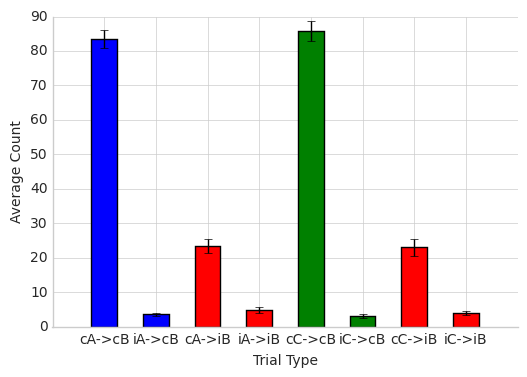

In [26]:
N = 8

conditions = ['cA->cB', 'iA->cB', 'cA->iB', 'iA->iB', 
              'cC->cB', 'iC->cB', 'cC->iB', 'iC->iB']
means_allsubjs = [df['corr_A_before_corr_B'].mean(), 
                  df['incorr_A_before_corr_B'].mean(),
                  df['corr_A_before_incorr_B'].mean(), 
                  df['incorr_A_before_incorr_B'].mean(), 
                  df['corr_C_before_corr_B'].mean(), 
                  df['incorr_C_before_corr_B'].mean(),
                  df['corr_C_before_incorr_B'].mean(), 
                  df['incorr_C_before_incorr_B'].mean()]

sem_allsubjs = [df['corr_A_before_corr_B'].std()/(np.sqrt(len(subs))), 
                df['incorr_A_before_corr_B'].std()/(np.sqrt(len(subs))),
                df['corr_A_before_incorr_B'].std()/(np.sqrt(len(subs))),
                df['incorr_A_before_incorr_B'].std()/(np.sqrt(len(subs))),
                df['corr_C_before_corr_B'].std()/(np.sqrt(len(subs))), 
                df['incorr_C_before_corr_B'].std()/(np.sqrt(len(subs))),
                df['corr_C_before_incorr_B'].std()/(np.sqrt(len(subs))),
                df['incorr_C_before_incorr_B'].std()/(np.sqrt(len(subs)))]

ind = np.arange(N)
width = 0.5

fig, ax2 = plt.subplots()

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

ax2.bar(ind, means_allsubjs, width, color = bar_colors, ecolor = 'black', 
       yerr = sem_allsubjs, align = 'center', bottom = 0)

ax2.set_xticks(ind)
ax2.set_xticklabels(conditions)
ax2.set_ylabel("Average Count")
ax2.set_xlabel("Trial Type")

plt.show()

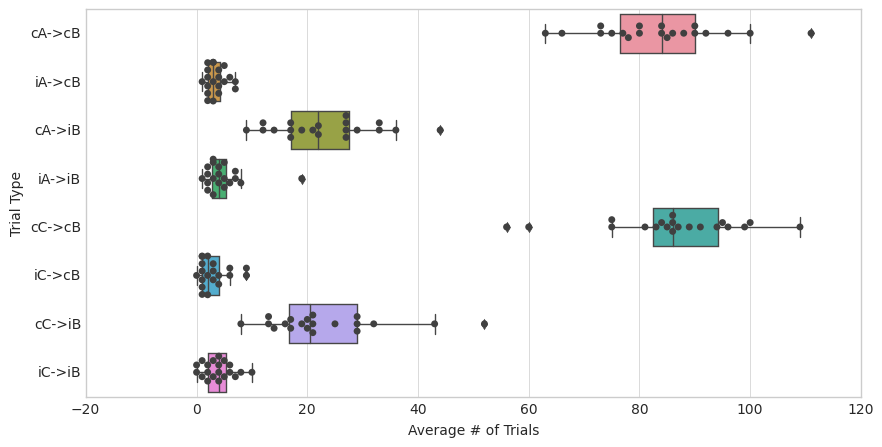

In [27]:
N = 8

conditions = ['cA->cB', 'iA->cB', 'cA->iB', 'iA->iB', 
              'cC->cB', 'iC->cB', 'cC->iB', 'iC->iB']
allsubjs = [df['corr_A_before_corr_B'], 
            df['incorr_A_before_corr_B'],
            df['corr_A_before_incorr_B'], 
            df['incorr_A_before_incorr_B'], 
            df['corr_C_before_corr_B'], 
            df['incorr_C_before_corr_B'],
            df['corr_C_before_incorr_B'], 
            df['incorr_C_before_incorr_B']]

ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=allsubjs, orient='h')
ax = sns.swarmplot(data=allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Average # of Trials")
plt.show()

A > CORR B: 0.959082327846
0.0190460040826
A > INCORR B: 0.826878753922
0.097680600099
C > CORR B: 0.965573349205
0.0304415748118
C > INCORR B: 0.857538738408
0.082507855825
A_b4_corrB vs A_b4_incorrB: (5.467203565360041, 2.8306796116418089e-05)
C_b4_corrB vs C_b4_incorrB: (6.6362346238322019, 2.3879466395076725e-06)


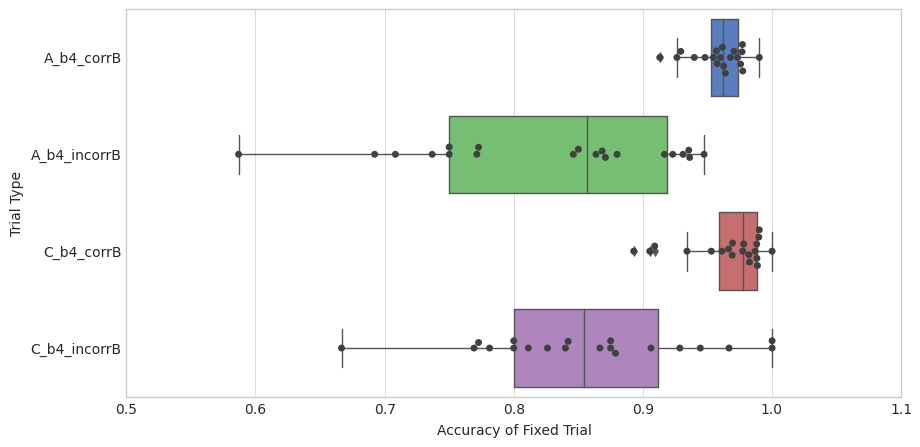

In [32]:
a_acc_corrB = df['corr_A_before_corr_B']/(df['corr_A_before_corr_B']+df['incorr_A_before_corr_B'])
print 'A > CORR B:', np.mean(a_acc_corrB)
print np.std(a_acc_corrB)

a_acc_incorrB = df['corr_A_before_incorr_B']/(df['corr_A_before_incorr_B']+df['incorr_A_before_incorr_B'])
print 'A > INCORR B:', np.mean(a_acc_incorrB)
print np.std(a_acc_incorrB)

c_acc_corrB = df['corr_C_before_corr_B']/(df['corr_C_before_corr_B']+df['incorr_C_before_corr_B'])
print 'C > CORR B:', np.mean(c_acc_corrB)
print np.std(c_acc_corrB)

c_acc_incorrB = df['corr_C_before_incorr_B']/(df['corr_C_before_incorr_B']+df['incorr_C_before_incorr_B'])
print 'C > INCORR B:', np.mean(c_acc_incorrB)
print np.std(c_acc_incorrB)


print "A_b4_corrB vs A_b4_incorrB:", stats.ttest_rel(a_acc_corrB, a_acc_incorrB)[:]
print "C_b4_corrB vs C_b4_incorrB:", stats.ttest_rel(c_acc_corrB, c_acc_incorrB)[:]


N = 4

conditions = ['A_b4_corrB', 'A_b4_incorrB', 'C_b4_corrB', 'C_b4_incorrB']
allsubjs = [a_acc_corrB, a_acc_incorrB, c_acc_corrB, c_acc_incorrB]

ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=allsubjs, orient='h')
ax = sns.swarmplot(data=allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Accuracy of Fixed Trial")
plt.show()

fixed_b4_corrB vs fixed_b4_incorrB: (15.516815833284253, 3.028761093805334e-12)


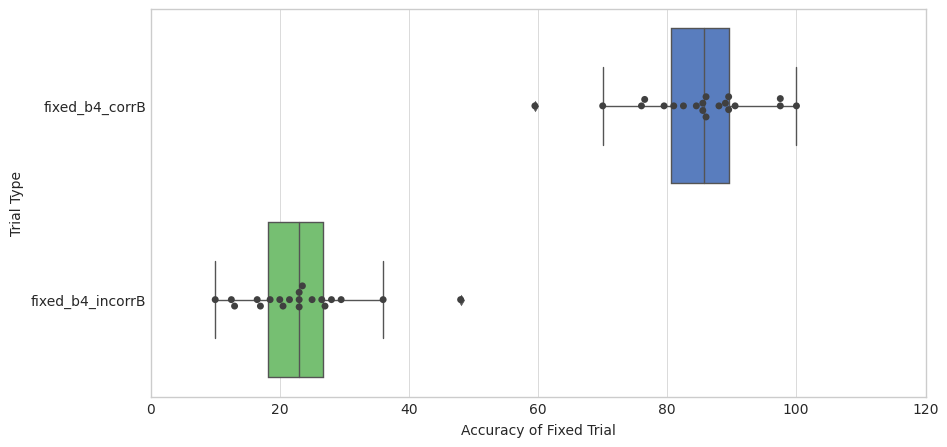

In [33]:
fixed_acc_corrB = df[['corr_A_before_corr_B', 'corr_C_before_corr_B']].mean(axis=1) 
fixed_acc_corrB = np.array(fixed_acc_corrB)

fixed_acc_incorrB = df[['corr_A_before_incorr_B', 'corr_C_before_incorr_B']].mean(axis=1) 
fixed_acc_incorrB = np.array(fixed_acc_incorrB)

print "fixed_b4_corrB vs fixed_b4_incorrB:", stats.ttest_rel(fixed_acc_corrB, fixed_acc_incorrB)[:]

N = 2

conditions = ['fixed_b4_corrB', 'fixed_b4_incorrB']
allsubjs = [fixed_acc_corrB, fixed_acc_incorrB]

ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=allsubjs, orient='h')
ax = sns.swarmplot(data=allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Accuracy of Fixed Trial")
plt.show()

In [7]:
count_average

,corr_A_before_corr_B,corr_A_before_incorr_B,corr_C_before_corr_B,corr_C_before_incorr_B,incorr_A_before_corr_B,incorr_A_before_incorr_B,incorr_C_before_corr_B,incorr_C_before_incorr_B
1,83.55,23.25,85.85,22.95,3.55,4.75,3,3.85


In [8]:
count_std

,corr_A_before_corr_B,corr_A_before_incorr_B,corr_C_before_corr_B,corr_C_before_incorr_B,incorr_A_before_corr_B,incorr_A_before_incorr_B,incorr_C_before_corr_B,incorr_C_before_incorr_B
1,11.151121,8.82539,12.309651,10.263893,1.687454,3.76663,2.569047,2.593742


In [21]:
# Counts within participanct may not sum to 240 (number of B trials) --
# Conditionals require a correct/incorrect response from both A & B trials --
# Non-response trials on either will remove trials from that possible total
df

,corr_A_before_corr_B,corr_A_before_incorr_B,corr_C_before_corr_B,corr_C_before_incorr_B,incorr_A_before_corr_B,incorr_A_before_incorr_B,incorr_C_before_corr_B,incorr_C_before_incorr_B
WMAZE_001,92,19,86,21,7,3,3,3
WMAZE_002,86,12,109,8,2,4,2,2
WMAZE_003,84,17,87,20,4,7,1,5
WMAZE_004,73,33,99,13,4,5,4,2
WMAZE_005,90,17,86,16,3,5,9,8
WMAZE_006,75,21,96,29,3,7,1,1
WMAZE_007,73,27,89,29,2,8,2,3
WMAZE_008,78,33,75,21,5,6,9,4
WMAZE_009,84,27,75,32,2,4,1,6
WMAZE_010,63,44,56,52,6,3,1,4


## Calculations for Reaction Time (across subs)

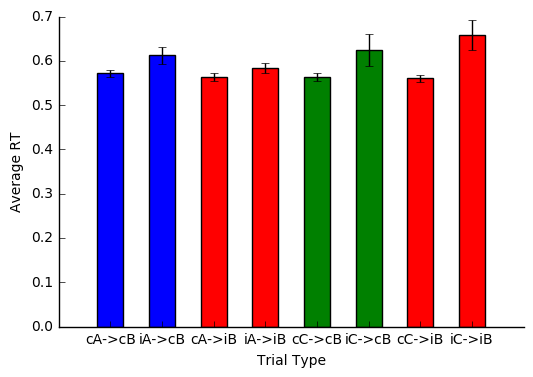

In [9]:
import matplotlib.pyplot as plt

N = 8
conditions = ['cA->cB', 'iA->cB', 'cA->iB', 'iA->iB', 
              'cC->cB', 'iC->cB', 'cC->iB', 'iC->iB']
bar_colors = ['blue', 'blue', 'red', 'red', 
              'green', 'green', 'red', 'red']
means_allsubjs = [df2['corr_A_before_corr_B_RTs'].mean(), 
                  df2['incorr_A_before_corr_B_RTs'].mean(),
                  df2['corr_A_before_incorr_B_RTs'].mean(), 
                  df2['incorr_A_before_incorr_B_RTs'].mean(), 
                  df2['corr_C_before_corr_B_RTs'].mean(), 
                  df2['incorr_C_before_corr_B_RTs'].mean(),
                  df2['corr_C_before_incorr_B_RTs'].mean(), 
                  df2['incorr_C_before_incorr_B_RTs'].mean()]

sem_allsubjs = [df2['corr_A_before_corr_B_RTs'].std()/(np.sqrt(len(subs))), 
                df2['incorr_A_before_corr_B_RTs'].std()/(np.sqrt(len(subs))),
                df2['corr_A_before_incorr_B_RTs'].std()/(np.sqrt(len(subs))),
                df2['incorr_A_before_incorr_B_RTs'].std()/(np.sqrt(len(subs))),
                df2['corr_C_before_corr_B_RTs'].std()/(np.sqrt(len(subs))), 
                df2['incorr_C_before_corr_B_RTs'].std()/(np.sqrt(len(subs))),
                df2['corr_C_before_incorr_B_RTs'].std()/(np.sqrt(len(subs))),
                df2['incorr_C_before_incorr_B_RTs'].std()/(np.sqrt(len(subs)))]

ind = np.arange(N)
width = 0.5

fig, ax2 = plt.subplots()

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

ax2.bar(ind, means_allsubjs, width, color = bar_colors, ecolor = 'black', 
       yerr = sem_allsubjs, align = 'center', bottom = 0)

ax2.set_xticks(ind)
ax2.set_xticklabels(conditions)
ax2.set_ylabel("Average RT")
ax2.set_xlabel("Trial Type")

plt.show()

cA->cB va iA->cB: (-1.8630187136695679, 0.077993688161266866)
cA->iB va iA->iB: (-1.3229813360535163, 0.20154389355026145)
cC->cB va iC->cB: (-1.8296212937779688, 0.083043957894523845)
cC->iB va iC->iB: (-2.6417839902899889, 0.016081794042500909)


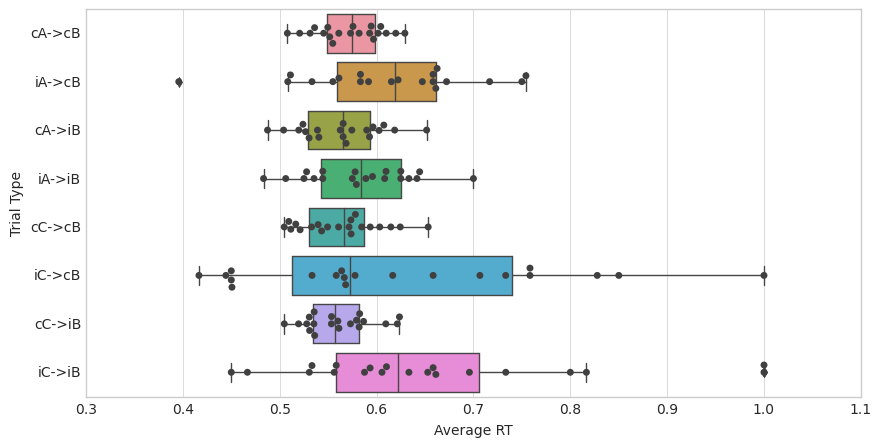

In [22]:
print 'cA->cB va iA->cB:',  stats.ttest_rel(df2['corr_A_before_corr_B_RTs'], df2['incorr_A_before_corr_B_RTs'])[:] 
print 'cA->iB va iA->iB:',  stats.ttest_rel(df2['corr_A_before_incorr_B_RTs'], df2['incorr_A_before_incorr_B_RTs'])[:]
print 'cC->cB va iC->cB:',  stats.ttest_rel(df2['corr_C_before_corr_B_RTs'], df2['incorr_C_before_corr_B_RTs'])[:]
print 'cC->iB va iC->iB:',  stats.ttest_rel(df2['corr_C_before_incorr_B_RTs'], df2['incorr_C_before_incorr_B_RTs'])[:]

N = 8

conditions = ['cA->cB', 'iA->cB', 'cA->iB', 'iA->iB', 
              'cC->cB', 'iC->cB', 'cC->iB', 'iC->iB']
allsubjs = [df2['corr_A_before_corr_B_RTs'], 
            df2['incorr_A_before_corr_B_RTs'],
            df2['corr_A_before_incorr_B_RTs'], 
            df2['incorr_A_before_incorr_B_RTs'], 
            df2['corr_C_before_corr_B_RTs'], 
            df2['incorr_C_before_corr_B_RTs'],
            df2['corr_C_before_incorr_B_RTs'], 
            df2['incorr_C_before_incorr_B_RTs']]

ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=allsubjs, orient='h')
ax = sns.swarmplot(data=allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Average RT")
plt.show()

A > CORR B: 0.485234913935
0.0410400725466
A > INCORR B: 0.491637203691
0.028746585846
C > CORR B: 0.481213965136
0.0553767528084
C > INCORR B: 0.466156675178
0.0567426295187
A_b4_corrB vs A_b4_incorrB: (-0.64773826291870884, 0.52490475363723488)
C_b4_corrB vs C_b4_incorrB: (1.0616311105908833, 0.30171193856028206)


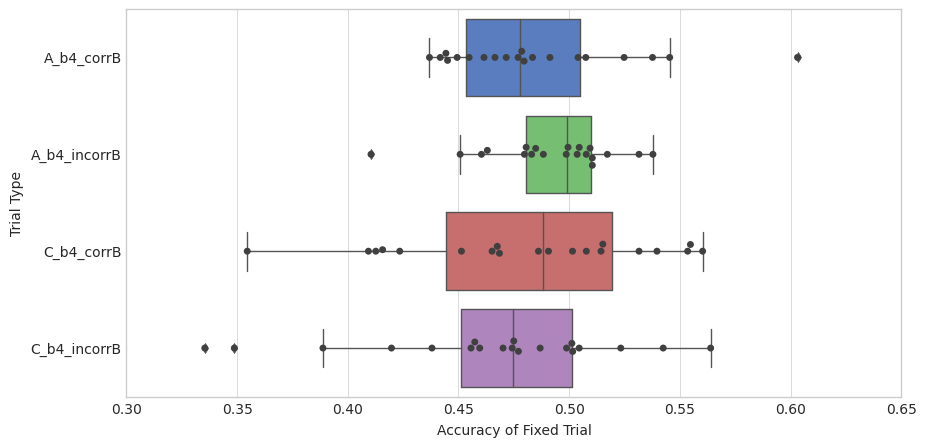

In [34]:
a_acc_corrB = df2['corr_A_before_corr_B_RTs']/(df2['corr_A_before_corr_B_RTs']+df2['incorr_A_before_corr_B_RTs'])
print 'A > CORR B:', np.mean(a_acc_corrB)
print np.std(a_acc_corrB)

a_acc_incorrB = df2['corr_A_before_incorr_B_RTs']/(df2['corr_A_before_incorr_B_RTs']+df2['incorr_A_before_incorr_B_RTs'])
print 'A > INCORR B:', np.mean(a_acc_incorrB)
print np.std(a_acc_incorrB)

c_acc_corrB = df2['corr_C_before_corr_B_RTs']/(df2['corr_C_before_corr_B_RTs']+df2['incorr_C_before_corr_B_RTs'])
print 'C > CORR B:', np.mean(c_acc_corrB)
print np.std(c_acc_corrB)

c_acc_incorrB = df2['corr_C_before_incorr_B_RTs']/(df2['corr_C_before_incorr_B_RTs']+df2['incorr_C_before_incorr_B_RTs'])
print 'C > INCORR B:', np.mean(c_acc_incorrB)
print np.std(c_acc_incorrB)


print "A_b4_corrB vs A_b4_incorrB:", stats.ttest_rel(a_acc_corrB, a_acc_incorrB)[:]
print "C_b4_corrB vs C_b4_incorrB:", stats.ttest_rel(c_acc_corrB, c_acc_incorrB)[:]


N = 4

conditions = ['A_b4_corrB', 'A_b4_incorrB', 'C_b4_corrB', 'C_b4_incorrB']
allsubjs = [a_acc_corrB, a_acc_incorrB, c_acc_corrB, c_acc_incorrB]

ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=allsubjs, orient='h')
ax = sns.swarmplot(data=allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Accuracy of Fixed Trial")
plt.show()

In [11]:
rt_average ={}
rt_std = {}

for curr_key in rt_table:
    rt_average[curr_key] = np.average(rt_table[curr_key])
    rt_std[curr_key] = np.average(rt_table[curr_key])
    
RT_average = pd.DataFrame(rt_average, index = (1,))
RT_std = pd.DataFrame(rt_std, index = (1,))

In [12]:
RT_average

,corr_A_before_corr_B_RTs,corr_A_before_incorr_B_RTs,corr_C_before_corr_B_RTs,corr_C_before_incorr_B_RTs,incorr_A_before_corr_B_RTs,incorr_A_before_incorr_B_RTs,incorr_C_before_corr_B_RTs,incorr_C_before_incorr_B_RTs
1,0.571985,0.563447,0.563069,0.560402,0.612142,0.583632,0.624556,0.657244


In [13]:
RT_std

,corr_A_before_corr_B_RTs,corr_A_before_incorr_B_RTs,corr_C_before_corr_B_RTs,corr_C_before_incorr_B_RTs,incorr_A_before_corr_B_RTs,incorr_A_before_incorr_B_RTs,incorr_C_before_corr_B_RTs,incorr_C_before_incorr_B_RTs
1,0.571985,0.563447,0.563069,0.560402,0.612142,0.583632,0.624556,0.657244


In [20]:
df2

,corr_A_before_corr_B_RTs,corr_A_before_incorr_B_RTs,corr_C_before_corr_B_RTs,corr_C_before_incorr_B_RTs,incorr_A_before_corr_B_RTs,incorr_A_before_incorr_B_RTs,incorr_C_before_corr_B_RTs,incorr_C_before_incorr_B_RTs
WMAZE_001,0.561114,0.565603,0.521153,0.586649,0.615372,0.527837,0.444523,0.695906
WMAZE_002,0.575730,0.651774,0.539722,0.519572,0.658406,0.625064,0.758438,0.816694
WMAZE_003,0.629306,0.607542,0.624505,0.623705,0.672323,0.588997,0.85012,0.800088
WMAZE_004,0.551709,0.596369,0.532932,0.530633,0.661260,0.644533,0.758435,0.733443
WMAZE_005,0.601701,0.574542,0.614808,0.621480,0.395901,0.506303,0.706756,0.610297
WMAZE_006,0.619880,0.618751,0.560872,0.553458,0.561221,0.609823,0.450095,0.466771
WMAZE_007,0.545478,0.519754,0.504751,0.582050,0.591761,0.544531,0.533482,0.450096
WMAZE_008,0.520692,0.504117,0.511567,0.536157,0.583435,0.535512,0.450798,0.587621
WMAZE_009,0.604377,0.530412,0.584684,0.609615,0.658419,0.575061,0.566776,0.605657
WMAZE_010,0.592907,0.592779,0.573566,0.561203,0.583416,0.595881,0.45012,0.558427


fixed_b4_corrB vs fixed_b4_incorrB: (1.0482517163545675, 0.307674792998894)


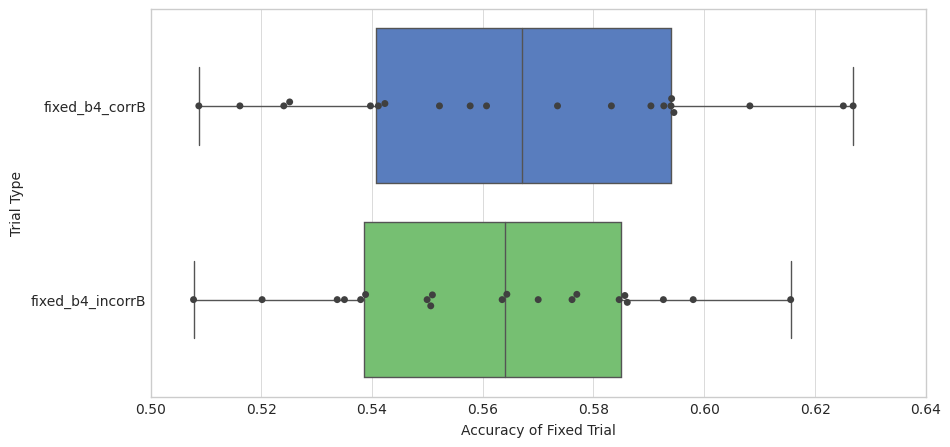

In [35]:
fixed_acc_corrB = df2[['corr_A_before_corr_B_RTs', 'corr_C_before_corr_B_RTs']].mean(axis=1) 
fixed_acc_corrB = np.array(fixed_acc_corrB)

fixed_acc_incorrB = df2[['corr_A_before_incorr_B_RTs', 'corr_C_before_incorr_B_RTs']].mean(axis=1) 
fixed_acc_incorrB = np.array(fixed_acc_incorrB)

print "fixed_b4_corrB vs fixed_b4_incorrB:", stats.ttest_rel(fixed_acc_corrB, fixed_acc_incorrB)[:]

N = 2

conditions = ['fixed_b4_corrB', 'fixed_b4_incorrB']
allsubjs = [fixed_acc_corrB, fixed_acc_incorrB]

ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=allsubjs, orient='h')
ax = sns.swarmplot(data=allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Accuracy of Fixed Trial")
plt.show()